# Skyrmion in a disk

In this tutorial, we compute and relax a skyrmion in a interfacial-DMI material in a confined disk like geometry.

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm

We define mesh in cuboid through corner points `p1` and `p2`, and discretisation cell size `cell`.

In [2]:
region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

The mesh we defined is:

In [4]:
mesh.k3d()

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Output()

Now, we can define the system object by first setting up the Hamiltonian:

In [5]:
system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv') 
               + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) 
               + mm.Demag()
               + mm.Zeeman(H=(0, 0, 2e5)))

Disk geometry is set up be defining the saturation magnetisation (norm of the magnetisation field). For that, we define a function:

In [6]:
Ms = 1.1e6

def Ms_fun(pos):
    """Function to set magnitude of magnetisation: zero outside cylindric shape, 
    Ms inside cylinder.
    
    Cylinder radius is 50nm.
    
    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

And the second function we need is the function to definr the initial magnetisation which is going to relax to skyrmion.

In [7]:
def m_init(pos):
    """Function to set initial magnetisation direction: 
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.
    
    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_fun)

The geometry is now:

In [8]:
system.m.norm.k3d_nonzero()

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Output()

and the initial magnetsation is:

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 400 and the array at index 1 has size 800

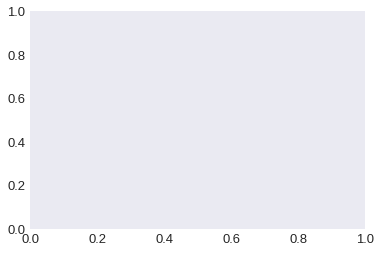

In [12]:
system.m.plane('z').mpl(scalar_lightness_field=system.m.z)

Finally we can minimise the energy and plot the magnetisation.

Running OOMMF (ExeOOMMFRunner) [2020/12/31 16:12]... (0.9 s)


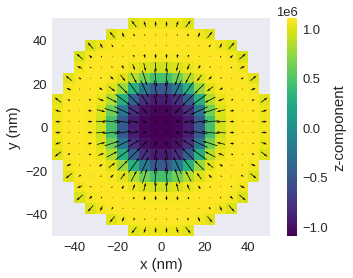

In [13]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

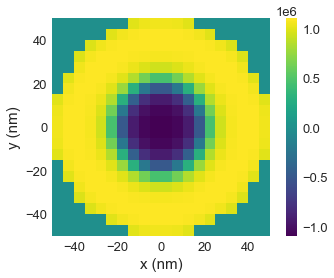

In [10]:
# Plot z-component only:
system.m.z.plane('z').mpl()

In [11]:
# 3d-plot of z-component
system.m.z.k3d_scalar(filter_field=system.m.norm)

Output()

Finally we can sample and plot the magnetisation along the line:

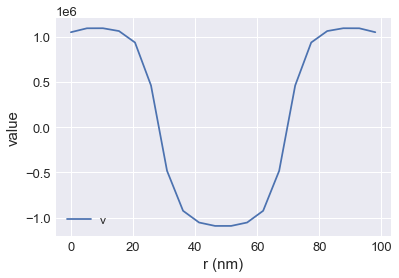

In [12]:
system.m.z.line(p1=(-49e-9, 0, 0), p2=(49e-9, 0, 0), n=20).mpl()

## Other

More details on various functionality can be found in the [API Reference](https://oommfc.readthedocs.io/en/latest/).